In [48]:
import numpy as np
import pandas as pd

In [49]:
test = pd.read_csv('D:\JOB\kaggle\pca.csv')

In [50]:
training = pd.read_csv('D:\JOB\kaggle\gca.csv')

In [51]:
training.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [52]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
training.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [54]:
training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [57]:
training.shape

(891, 12)

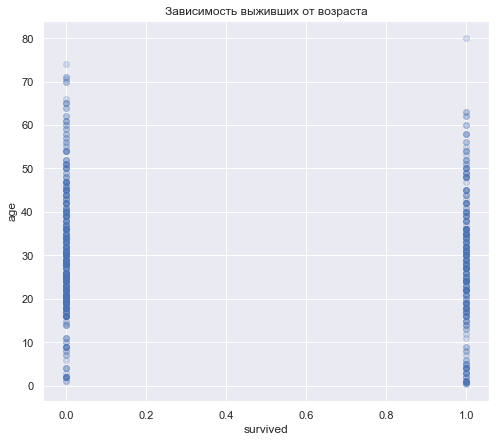

In [58]:
fig=plt.figure(figsize=(8,7))
plt.scatter(training.Survived, training.Age, alpha=0.2)
plt.title('Зависимость выживших от возраста')
plt.xlabel('survived')
plt.ylabel('age')

plt.show()

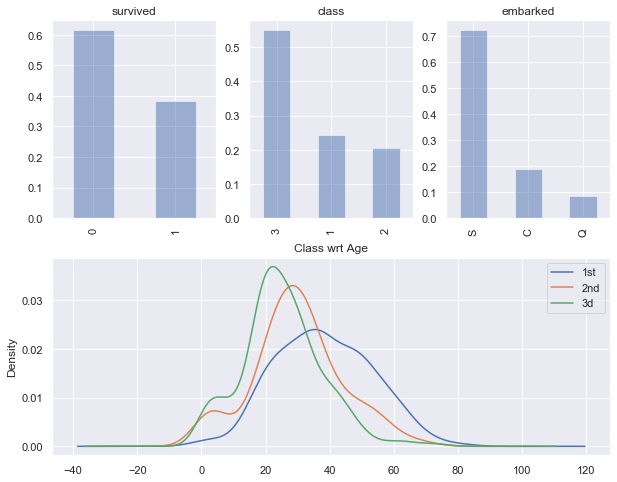

In [59]:
fig=plt.figure(figsize=(10,8))
plt.subplot2grid((2,3),(0,0))
training.Survived.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('survived')

plt.subplot2grid((2,3),(0,1))
training.Pclass.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('class')

plt.subplot2grid((2,3),(1,0),colspan=3)
for x in [1,2,3]:
    training.Age[training.Pclass==x].plot(kind='kde')
plt.legend(('1st','2nd','3d'))
plt.title('Class wrt Age')

plt.subplot2grid((2,3),(0,2))
training.Embarked.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('embarked')

plt.show()

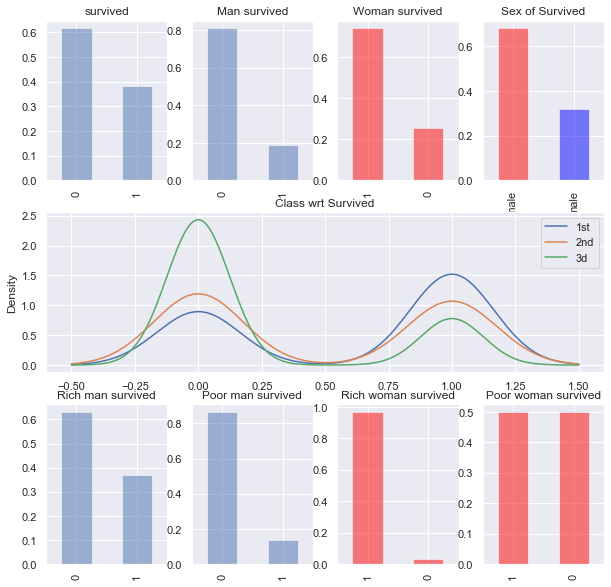

In [60]:
fig=plt.figure(figsize=(10,10))
plt.subplot2grid((3,4),(0,0))
training.Survived.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('survived')

plt.subplot2grid((3,4),(0,1))
training.Survived[training.Sex =='male'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('Man survived')

plt.subplot2grid((3,4),(0,2))
training.Survived[training.Sex =='female'].value_counts(normalize=True).plot(kind='bar',alpha=0.5,color='red')
plt.title('Woman survived')

plt.subplot2grid((3,4),(0,3))
training.Sex[training.Survived == 1].value_counts(normalize=True).plot(kind='bar',alpha=0.5,color=['red','blue'])
plt.title('Sex of Survived')

plt.subplot2grid((3,4),(1,0),colspan=4)
for x in [1,2,3]:
    training.Survived[training.Pclass==x].plot(kind='kde')
plt.legend(('1st','2nd','3d'))
plt.title('Class wrt Survived')

plt.subplot2grid((3,4),(2,0))
training.Survived[(training.Sex =='male') & (training.Pclass==1)].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('Rich man survived')

plt.subplot2grid((3,4),(2,1))
training.Survived[(training.Sex =='male') & (training.Pclass==3)].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('Poor man survived')

plt.subplot2grid((3,4),(2,2))
training.Survived[(training.Sex =='female') & (training.Pclass==1)].value_counts(normalize=True).plot(kind='bar',alpha=0.5, color='red')
plt.title('Rich woman survived')

plt.subplot2grid((3,4),(2,3))
training.Survived[(training.Sex =='female') & (training.Pclass==3)].value_counts(normalize=True).plot(kind='bar',alpha=0.5,color='red')
plt.title('Poor woman survived')

plt.show()

In [61]:
train_test_data=[training,test]
for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [62]:
training['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Lady          1
Sir           1
Capt          1
Mme           1
Jonkheer      1
Countess      1
Ms            1
Don           1
Name: Title, dtype: int64

In [63]:
title_mapping = {"Mr":0, 'Miss':1, 'Mrs':2, 'Master':3,'Dr':3,'Rev':3,'Col':3,'Mlle':3,'Major':3,
                 'Lady':3,'Sir':3,'Capt':3,'Mne':3,'Jonkheer':3,'Countess':3,'Ms':3,'Don':3}
for dataset in train_test_data:
    dataset['Title'] = dataset ['Title'].map(title_mapping)

In [64]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [65]:
training=training.drop('Name', axis=1)
test=test.drop('Name', axis=1)

In [66]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [67]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [115]:
def clean_data(training):
    training['Fare'] = training['Fare'].fillna(training['Fare'].dropna().median())
    training['Age'] = training['Age'].fillna(training['Age'].dropna().median())
    training['Title'] = training['Title'].fillna(training['Title'].dropna().median())
    
    training.loc[training["Sex"] == "male", "Sex"] = 0
    training.loc[training["Sex"] == "female", "Sex"] = 1

    training["Embarked"] = training["Embarked"].fillna("S")
    training.loc[training["Embarked"] == "S", "Embarked"] = 0
    training.loc[training["Embarked"] == "C", "Embarked"] = 1
    training.loc[training["Embarked"] == "Q", "Embarked"] = 2
    
    training.loc[training['Age']<=18, 'Age'] = 0,
    training.loc[(training['Age']>18) & (training['Age']<=30), 'Age'] = 1,
    training.loc[(training['Age']>30) & (training['Age']<=45), 'Age'] = 2,
    training.loc[(training['Age']>45) & (training['Age']<=60), 'Age'] = 3,
    training.loc[training['Age']>60, 'Age'] = 4
    
    training.loc[training['Fare']<=8, 'Fare'] = 0,
    training.loc[(training['Fare']>8) & (training['Fare']<=14), 'Fare'] = 1,
    training.loc[(training['Fare']>14) & (training['Fare']<=31), 'Fare'] = 2,
    training.loc[training['Fare']>31, 'Fare'] = 3
    
clean_data(training)

In [116]:
def clean_data(test):
    test['Fare'] = test['Fare'].fillna(test['Fare'].dropna().median())
    test['Age'] = test['Age'].fillna(test['Age'].dropna().median())
    test['Title'] = test['Title'].fillna(test['Title'].dropna().median())
    
    test.loc[test["Sex"] == "male", "Sex"] = 0
    test.loc[test["Sex"] == "female", "Sex"] = 1

    test["Embarked"] = test["Embarked"].fillna("S")
    test.loc[test["Embarked"] == "S", "Embarked"] = 0
    test.loc[test["Embarked"] == "C", "Embarked"] = 1
    test.loc[test["Embarked"] == "Q", "Embarked"] = 2
    
    test.loc[test['Age']<=18, 'Age'] = 0,
    test.loc[(test['Age']>18) & (test['Age']<=30), 'Age'] = 1,
    test.loc[(test['Age']>30) & (test['Age']<=45), 'Age'] = 2,
    test.loc[(test['Age']>45) & (test['Age']<=60), 'Age'] = 3,
    test.loc[test['Age']>60, 'Age'] = 4
    
    test.loc[test['Fare']<=8, 'Fare'] = 0,
    test.loc[(test['Fare']>8) & (test['Fare']<=14), 'Fare'] = 1,
    test.loc[(test['Fare']>14) & (test['Fare']<=31), 'Fare'] = 2,
    test.loc[test['Fare']>31, 'Fare'] = 3
    
clean_data(test)

In [98]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,0.0,0,0,330911,0.0,NaN,2,0.0
1,893,3,1,0.0,1,0,363272,0.0,NaN,0,2.0
2,894,2,0,0.0,0,0,240276,0.0,NaN,2,0.0
3,895,3,0,0.0,0,0,315154,0.0,NaN,0,0.0
4,896,3,1,0.0,1,1,3101298,0.0,NaN,0,2.0


In [99]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,0.0,0,0,330911,0.0,NaN,2,0.0
1,893,3,1,0.0,1,0,363272,0.0,NaN,0,2.0
2,894,2,0,0.0,0,0,240276,0.0,NaN,2,0.0
3,895,3,0,0.0,0,0,315154,0.0,NaN,0,0.0
4,896,3,1,0.0,1,1,3101298,0.0,NaN,0,2.0


In [103]:
training.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)
training.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [105]:
training.drop('PassengerId', axis=1, inplace=True)

In [106]:
training.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,0.0,1,0,0.0,0,0.0
1,1,1,1,0.0,1,0,0.0,1,2.0
2,1,3,1,0.0,0,0,0.0,0,1.0
3,1,1,1,0.0,1,0,0.0,0,2.0
4,0,3,0,0.0,0,0,1.0,0,0.0


In [130]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10, shuffle=True, random_state=0)

In [131]:
target=training['Survived']
train_data=training.drop('Survived', axis=1)

In [132]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
neighbor=KNeighborsClassifier(n_neighbors=10)
score=cross_val_score(neighbor, train_data,target, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)

[0.8        0.80898876 0.7752809  0.83146067 0.86516854 0.82022472
 0.83146067 0.78651685 0.83146067 0.82022472]


In [133]:
round(np.mean(score)*100,2)

81.71

In [134]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier()
score=cross_val_score(tree, train_data,target, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)

[0.77777778 0.82022472 0.76404494 0.83146067 0.8988764  0.82022472
 0.83146067 0.80898876 0.78651685 0.79775281]


In [135]:
round(np.mean(score)*100,2)

81.37

In [136]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators=10)
score=cross_val_score(forest, train_data,target, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)

[0.81111111 0.79775281 0.7752809  0.83146067 0.87640449 0.82022472
 0.83146067 0.80898876 0.7752809  0.78651685]


In [137]:
round(np.mean(score)*100,2)

81.14

In [142]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
bayes= GaussianNB()
score=cross_val_score(bayes, train_data,target, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)

[0.8        0.74157303 0.82022472 0.79775281 0.80898876 0.80898876
 0.83146067 0.79775281 0.83146067 0.85393258]


In [143]:
round(np.mean(score)*100,2)

80.92

In [144]:
#SVM
from sklearn.svm import SVC
supvec= SVC()
score=cross_val_score(supvec, train_data,target, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)

[0.82222222 0.75280899 0.82022472 0.82022472 0.83146067 0.80898876
 0.83146067 0.83146067 0.84269663 0.86516854]


D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'aut

In [145]:
round(np.mean(score)*100,2)

82.27

In [148]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,0.0,0,0,0.0,2,0.0
1,893,3,1,0.0,1,0,0.0,0,2.0
2,894,2,0,0.0,0,0,0.0,2,0.0
3,895,3,0,0.0,0,0,0.0,0,0.0
4,896,3,1,0.0,1,1,0.0,0,2.0


In [149]:
#testing
best_model=SVC()
best_model.fit(train_data,target)

test_data=test.drop('PassengerId', axis=1).copy()
prediction=best_model.predict(test_data)

D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [158]:
submission=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':prediction})
submission.to_csv('submission9.csv',index=False)

In [159]:
submission=pd.read_csv('D:\JOB\kaggle\submission9.csv')

In [160]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
